# Ray Measuring ROIs from Image Data

## Note: this same processing can be done through an ImageJ Plugin
## The imagej plugin zip folder is located in the raym folder

---

This notebook workspace runs a Ray Measuring Algorithm, which can characterize a ROI pixel border band.


In general an algorithm is developed, which iterates along the border band of ROIs, obtained from **ImageJ**.

Specifically the algorithm depends on ImageJ, using code inside the ImageJ Plugin, which obtains:
  1. ROI Border info (x,y coordinates of border points);
  2. ROI Summary data (obtained inside ImageJ using the **Measure** command inside the **ROI Manager**).


---


After this initial data is obtained, the **ray measuring, image processing algorithm** has these steps:


1. **Draws rays** staring at ROI centroid, continuing to the isolation(myelin) band edge (defined specifically on a 3-class image data);


2. Applies discriminating conditions, which subset the above ray measurements
  1. Ray ends in own ROI, possible because of twisted fibers,
  2. Ray ends in other ROI, possible because of interjoined fibers,
  3. Ray measured zero pixel band,
  4. Ray measured has more than x(=15) pixel space after end of band, useful if the ROI band is split lengthwise;


3. **Match ROIs** with a possible annotated set. Each ROI is compared with ImageJ **Measure command** data:
  + **Area** percantage overlap between the two ROIs;
  + **Centroid** distance.
  
  
4. Applying **Post Conditions**, which discriminate by **thresholded discarding** of damaged ROIs:
  1. isolation(myelin) pixel radius/ROI(axon) pixel radius, is over a **predefined fraction**, for a **predefined percentage** of the full ROI band.
  2. zero izolation(myelin) for a **predefined percentage** of the full ROI band.


5. Possibly **Draw Gratio**, i.e. a scatter plot and histogram comparison of **DNN Corrected** and **Annotated Consensus Corrected** image data.
  
 




### Note: The current  parameters specified below, only display a scatter plot/histogram Gratio comparison
### The full procedure parameters can be viewed entierly inside the Imagej plugin

The display config parameters specified below, are:

1. ray measuring save folder;
2. separate data output name tags;
3. Input Image Sets (Corrected vs DNN_Drawn);
4. Boolean flags setting which ROI data to compare -> post processing conditions, or "matched" ROIs;
5. ROI matching thresholds;
6. Plotting title texts.

In [1]:

confD={'raymeas_save_dir':r'../test_data/ray_meas_data', 
'raymeas_add_id':'raym_17_07_07_ml1',  

'match_add_id': 'match_17_07_07_ml1',  
'postconds_id': 'postc_17_07_07_ml1',
'base_meas_roiDir':'Imagej_ROIDir_ml1',
'case_id_add1':'DNN',
'case_id_add2':'CORR',



 # 1 for displaying post conds, 3 for matches
'map_roi_thres':1,  
'match_rois_sp2':0,  # Default: 0 for no match


# ROI Matching parameters
'strict_area_thres':0.6, 
'strict_dist_thres':20, 

'title_text':'"DNN vs Corr..."',
'total_str': '',
'afterc_str': '',
'hist_title':'"DNN post conds. vs Corr ROIs"',
       
       
       
}


## Setup of Ray Measuring Procedure

This code  setups the 4 different possible steps of the Ray Measuring algorithm.

Then they can be executed below.

### Currently only drawing/plotting functionality is enabled

0 0
0 (5945, 2) 5608

Regression CORR : 0.002589039682012912 * x + [0.46574347]
Regression DNN : 0.002874422068177267 * x + [0.43444531]
[['sp13726-img01' '0141-1976' '0']
 ['sp13726-img01' '0049-0668' '1']
 ['sp13726-img01' '0031-0355' '3']
 ...
 ['sp14436-img08' '0142-1338' '7893']
 ['sp14436-img08' '0206-1924' '7894']
 ['sp14436-img08' '0190-1801' '7896']]
!!!!!!!!!!!!!!!!!!!!!!!!!
[ 11.72964499  23.01798424  34.3063235   45.59466276  56.88300202
  68.17134128  79.45968053  90.74801979 102.03635905 113.32469831
 124.61303756 135.90137682 147.18971608 158.47805534 169.76639459
 181.05473385 192.34307311 203.63141237 214.91975163 226.20809088
 237.49643014 248.7847694  260.07310866 271.36144791 282.64978717
 293.93812643 305.22646569 316.51480495 327.8031442  339.09148346
 350.37982272 361.66816198 372.95650123 384.24484049 395.53317975
 406.82151901 418.10985826 429.39819752 440.68653678 451.97487604
 463.2632153  474.55155455 485.83989381 497.12823307 508.41657233
 519.70491158 530.

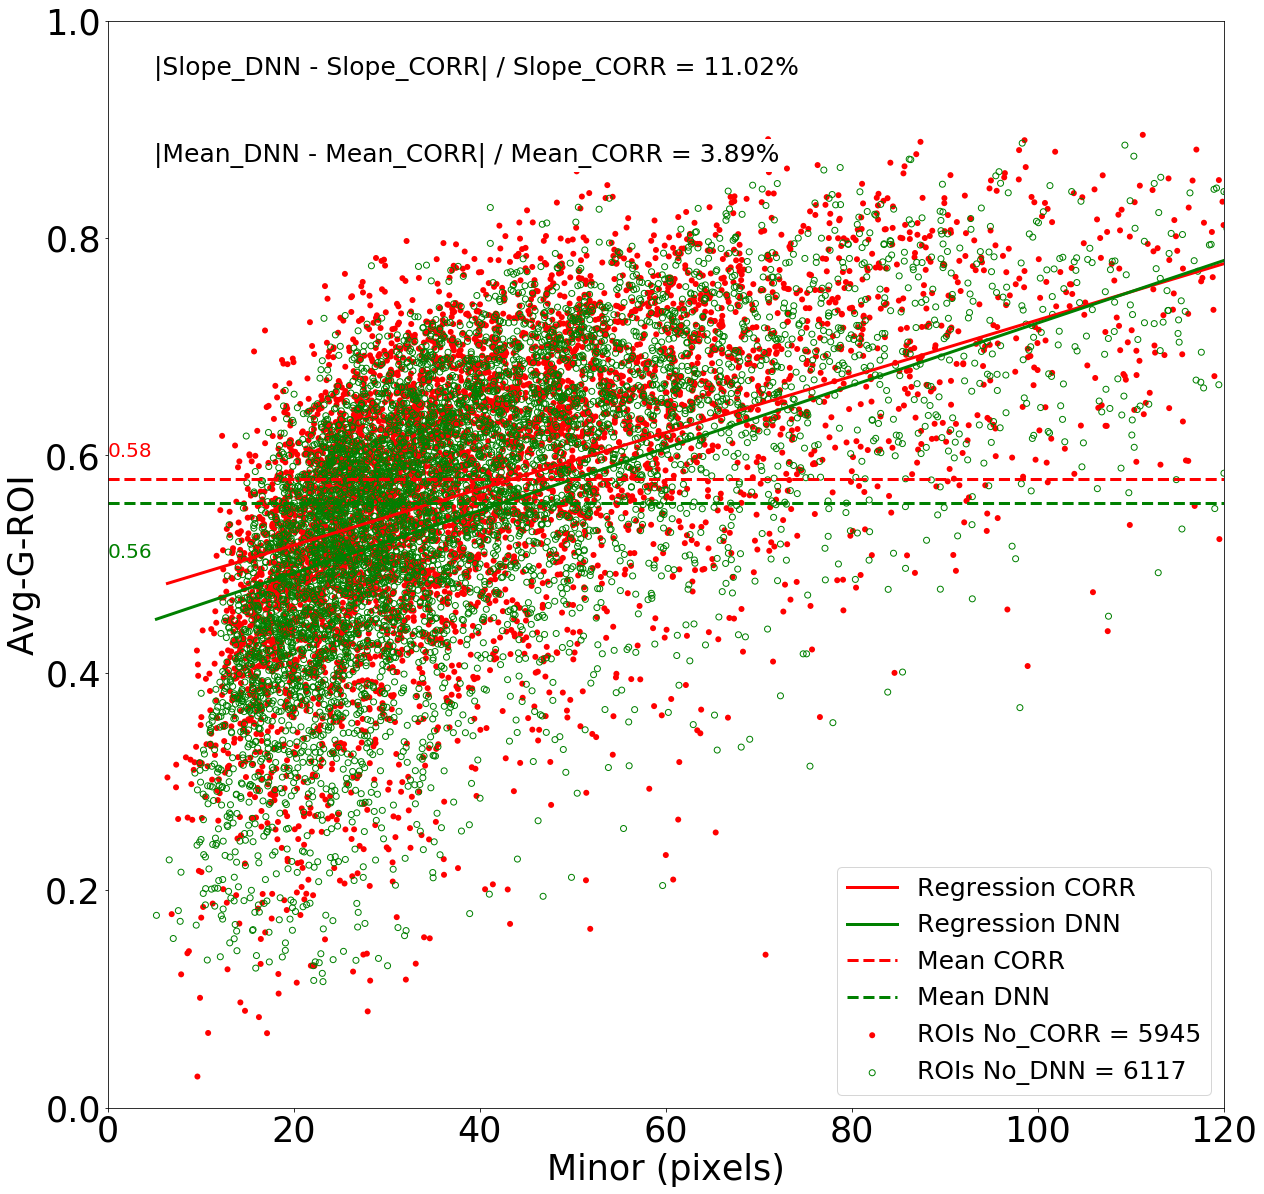

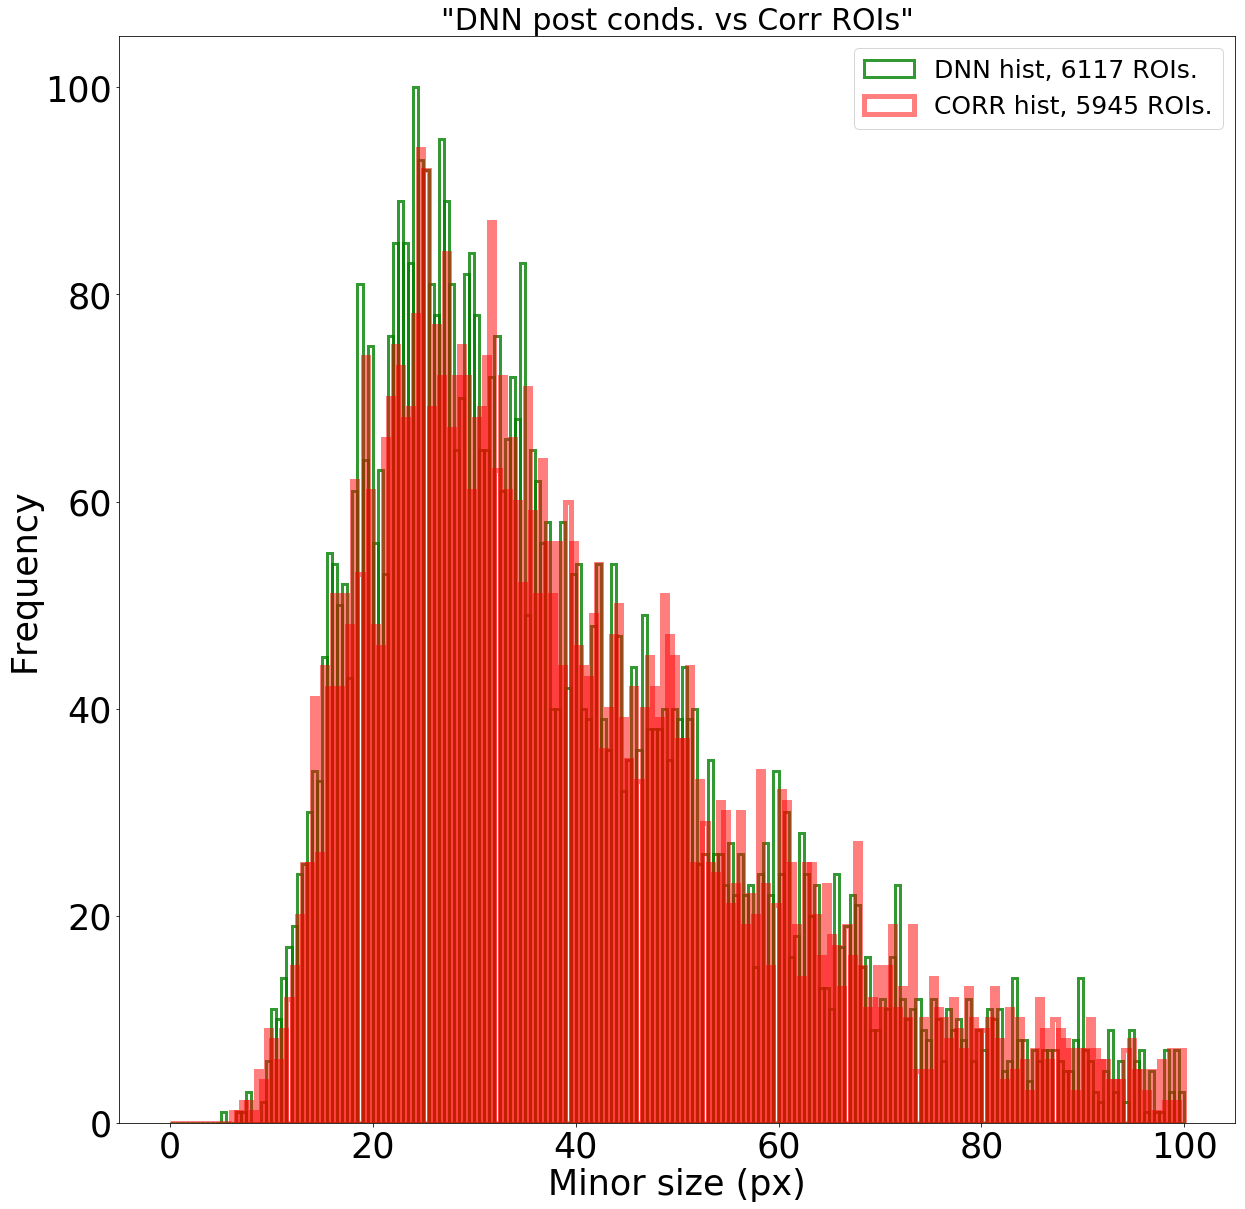

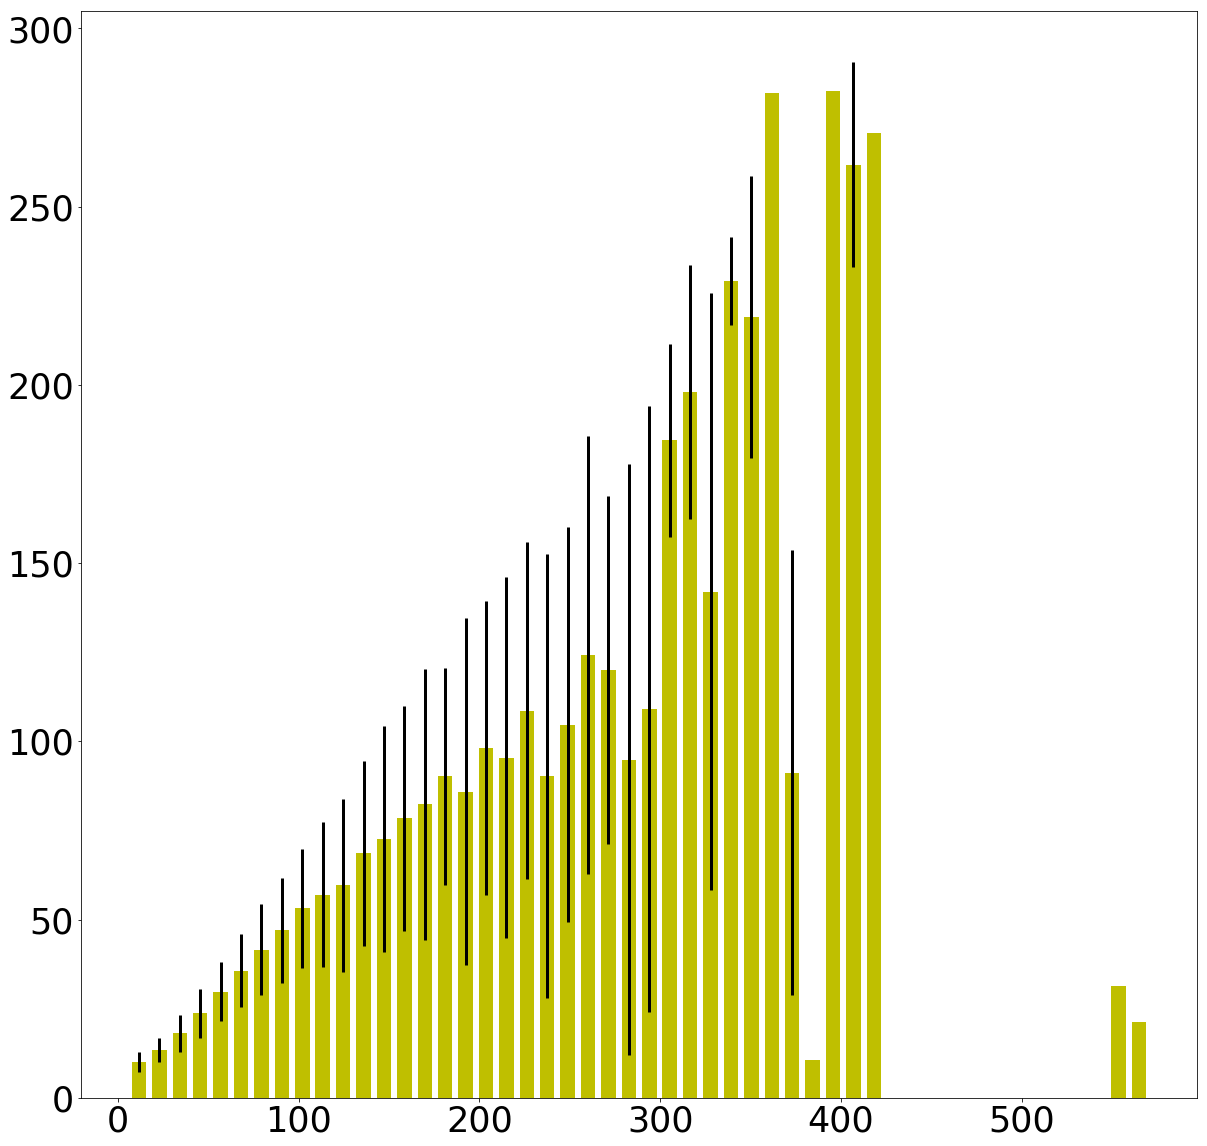

In [4]:
import sys
import warnings
warnings.filterwarnings('ignore')

# args=['python','../raym/ray_meas.py']
# args=['python','../raym/calc_matches.py']
# args=['python','../raym/find_postc_params.py']
# args=['python','../raym/draw_gratio_normaltry.py']
sys.path.append('../..')




import dnn_segmentation.raym.draw_gratio_normaltry as dgnt

dgnt.main_loop(confD)


## Execute Ray Measuring Procedures

This code block actuually executes the **above** chosen ray measuring procedure, while also displaying the output.

### **Not currently implemented !**

+ The code runs in a separate sub process, thus using the base functionality, contained in 4 diffrent scripts.



In [ ]:

import sys,os
from subprocess import Popen,PIPE
import subprocess

args.extend(['--{}={}'.format(item,val) for item,val in confD.items()])

print(' '.join(args))


run_attempt= subprocess.run(' '.join(args),stdout=open(os.devnull, "w"),shell=True,cwd='.',
                            stderr=PIPE)

# outp_str=run_attempt.stdout.decode('utf-8')
err_str=run_attempt.stderr.decode('utf-8')
print(err_str,outp_str)

print('I am here')